# 記述統計と推測統計

## <u>記述統計</u>

<center>
  <br>
    <b>data の特徴を記述する　（例： 平均値, 中央値）</b>
  <br>
</center>



## <u>推測統計</u>

<center>
  <br>
    <b>標本から母集団の特徴を推測する</b>
  <br>
</center>

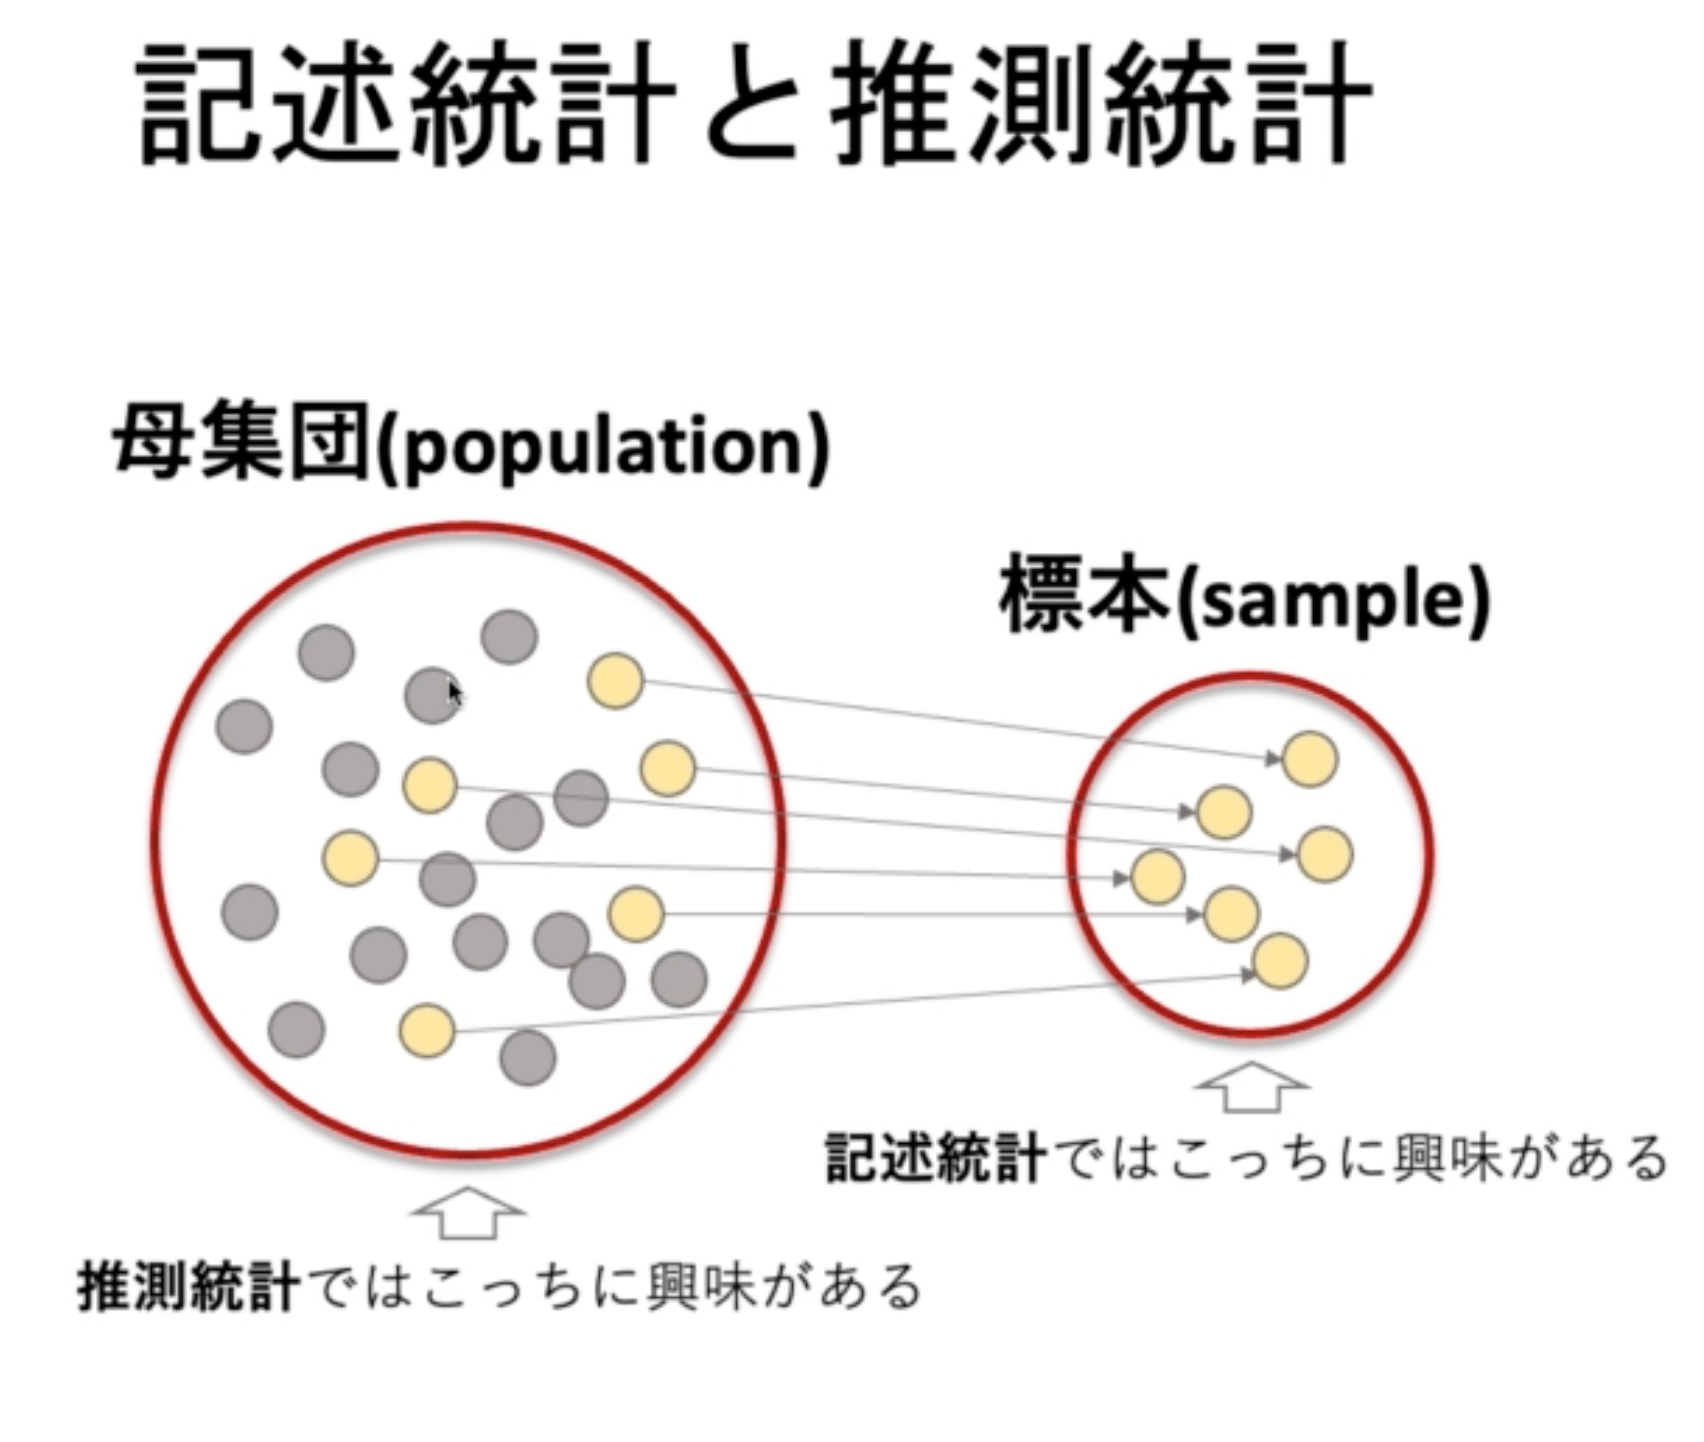

# 代表値
## <u>平均値</u>　mean

<center>
  <br>
        <h3><font color="red"><b>dataの平均的な値</b></font></h3>
  <br>
  <br>
</center>

- data の合計をdata数で割った値（算術平均）
    - 最も基本的な値

    - **標本平均を　　$\bar{x}$**
    - **母集団平均　　$\mu$**

$$
\bar{x}　=　\frac{x_1 + x_2 + ... + x_n}{n} \\
\\
$$

$$
\bar{x}　=　\frac{1}{n}\sum_{i=1}^{n}　x_i \\
\\
$$


<center>
<br>
<img src="images/mean.png"  width="500" height="300"><br>
<br>
</center>

<center>
<br>
<img src="images/mean2.png"  width="600" height="400"><br>
<br>
</center>

## 平均値　（mean）
- 平均値を求める
- 平均値の描画

In [39]:
import numpy as np
import seaborn as sns
from scipy import stats
df = sns.load_dataset('tips')
df['tip_rate'] = df['tip'] / df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [7]:
# tip の平均値
np.mean(df['tip'])

2.9982786885245902

このお店の tip の平均は **3＄** くらい

In [11]:
# tip_rate
np.mean(df['tip_rate'])

0.16080258172250478

だいたい請求金額の　**16%**　の tip を渡していることがわかる

In [15]:
# df Series に対して平均を求める
df['tip_rate'].mean()

0.16080258172250478

In [17]:
# groupby : 性別によって　tip_rate の差がどれくらいあるのか？
df.groupby('sex').mean()

,total_bill,tip,size,tip_rate
sex,,,,
Male,20.744076,3.089618,2.630573,0.157651
Female,18.056897,2.833448,2.459770,0.166491


In [18]:
# tip_rate だけ見たかったら
df.groupby('sex').mean()['tip_rate']

sex
Male      0.157651
Female    0.166491
Name: tip_rate, dtype: float64

<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

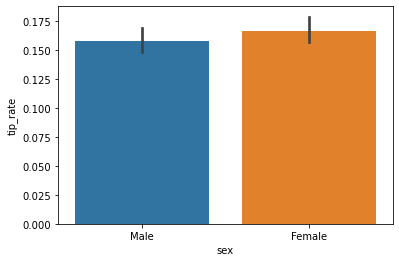

In [19]:
# 男女別の tip_rate : estimator=<function mean > default = 平均値になる
sns.barplot(x='sex', y='tip_rate', data=df)

<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

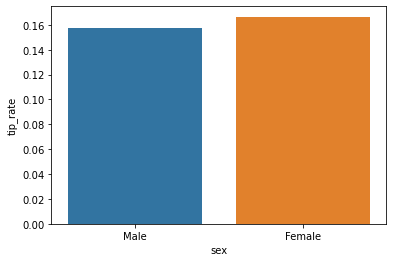

In [21]:
# 男女別の tip_rate : ci（confidence interval） = 信頼区間 -> エラーバー
sns.barplot(x='sex', y='tip_rate', data=df, ci=None)

<AxesSubplot:xlabel='sex'>

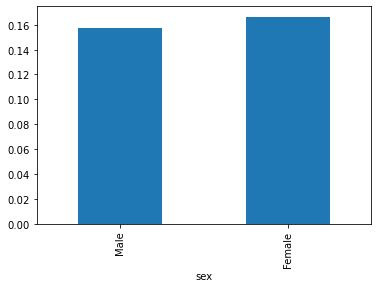

In [22]:
# Series からでも plot できる
df.groupby('sex').mean()['tip_rate'].plot(kind='bar')

## <u>中央値</u> （median）

<center>
  <br>
    <h3><font color="red"><b>dataを順番に並べた場合の真ん中の値</b></font></h3>
  <br>
</center>


<center>
<br>
<img src="images/median.png"  width="500" height="300"><br>
<br>
</center>

### 中央値 (median)
- 中央値を求める
- 中央値を描画する

In [24]:
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [26]:
# data 全体の tip_rate の中央値
np.median(df['tip_rate'])

0.15476977125802577

- data全体の　tip rate は **15.4%**　であることが分かる

    - 前回の平均値 **16%** とはだいぶ違う
    
        - `外れ値の影響が大きい`

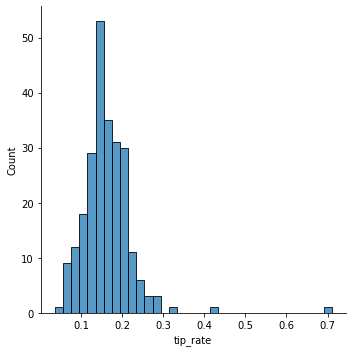

In [28]:
# ヒストグラムで確認する　：　１人だけ 70% の tip を払っている人がいる　
sns.displot(df['tip_rate'], kde=False)

70% の tip を払っている人がいる　　＝　**外れ値の影響を受けている**

中央値は　**外れ値**　の値の影響を受けにくい

In [32]:
# df Series から中央値を取得
df['tip_rate'].median()

0.15476977125802577

In [33]:
# 性別ごとに tip_rate の中央値を比較　
df.groupby('sex').median()

,total_bill,tip,size,tip_rate
sex,,,,
Male,18.35,3.00,2,0.153492
Female,16.40,2.75,2,0.155581


<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

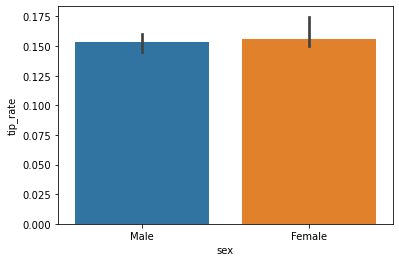

In [35]:
# 中央値で棒グラフを描画する
sns.barplot(x='sex', y='tip_rate', data=df, estimator=np.median)

<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

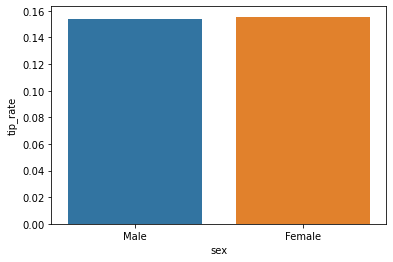

In [36]:
# 中央値で棒グラフを描画する　: ci = 信頼区間　→ エラーバー非表示にする
sns.barplot(x='sex', y='tip_rate', data=df, estimator=np.median, ci=None)

In [38]:
# tip を多く払っている　dataを見てみる ※ default 昇順になっているので降順にする
df.sort_values('tip_rate', ascending=False)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
...,...,...,...,...,...,...,...,...
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.065660
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
57,26.41,1.50,Female,No,Sat,Dinner,2,0.056797
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433


## <u>最頻値</u>　(mode)

<center>
  <br>
  <br>
    <h3><font color="red"><b>dataの中で最も観察される値</b></font></h3>
  <br>
</center>

<center>
<br>
<img src="images/mode.png"  width="600" height="400"><br>
<br>
</center>

### 最頻値　(mode)
- 最頻値を求める

 - [Scipy](https://scipy.org/)
 - [stats : (統計学)](https://scipy.github.io/devdocs/reference/stats.html?highlight=stats#module-scipy.stats)

```python
from scipy import stats
```

In [40]:
stats.mode([1, 2, 2, 2, 3, 4])

ModeResult(mode=array([2]), count=array([3]))

2つの情報が返ってくるので **unpacking** してあげる

In [47]:
mode, count = stats.mode([1, 2, 2, 2, 3, 4])
print(f'mode(一番多い値): {mode}\ncount（何個あるか）: {count}')

mode(一番多い値): [2]
count（何個あるか）: [3]


In [45]:
mode

array([2])

In [46]:
count

array([3])

In [49]:
# df を入れてみる
mode, count = stats.mode(df)
print(f'mode: {mode}\ncount: {count}')

mode: [[13.42 2.0 'Male' 'No' 'Sat' 'Dinner' 2 0.1448225923244026]]
count: [[  3  33 157 151  87 176 156   2]]


In [50]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [56]:
# Series に対して　mode : 一番多いサイズ
df['tip_rate'].mode()

0    0.144823
1    0.153846
dtype: float64

In [54]:
# Series -> mode
mode, count = stats.mode(df['size'])
print(f'mode (最頻値): {mode}\ncount (出現回数): {count}')

mode (最頻値): [2]
count (出現回数): [156]
